In [1]:
import pandas as pd
import sklearn

pt_info_clean = pd.read_csv("../data/processed/pt_info_clean.csv")

We begin by splitting the data into 2 sets:

- `train`: a set of feature vectors which will be used to train the model

- `test`:  a set of feature vectors which will be used to evaluate the model we trained

In [3]:
from sklearn import model_selection
train, test = model_selection.train_test_split(pt_info_clean, random_state=43)

In [7]:
x_train = train.iloc[:,2:train.shape[1]]
x_test = test.iloc[:,2:train.shape[1]]
y_train = train['mrsa_positive']
y_test = test['mrsa_positive']

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=430, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=3.0, max_iter=10, multi_class='multinomial',
                   random_state=430)

In [9]:
predictions = model.predict(x_test)

[[24  0]
 [ 1 11]]


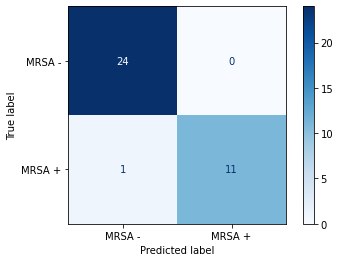

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['MRSA -', 'MRSA +']
                  
disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)

We want to save the model so that we can use it outside of this notebook.

In [12]:
model

LogisticRegression(C=3.0, max_iter=10, multi_class='multinomial',
                   random_state=430)

In [13]:
from mlworkflows import util
util.serialize_to(model, "../models/logistic_model.sav")